In [2]:
import pandas as pd
import numpy as np

In [3]:
!pwd

/Users/batuan/Documents/Master1Luminy/semetre2/TER/code/src


In [3]:
evaluation_df = pd.read_csv('../EvaluationDictionary/google_translate/EN_FR/EN_FR_all.csv', delimiter='#', error_bad_lines=False)
build_df = pd.read_csv('../ToSubmitDictionary/Word2Vec/Dictionary_Just_Connect/ModelW2Vall_trans_en-fr.tsv', delimiter='\t', error_bad_lines=False,
                                names=["word", "trans", "pos", 'confidence'])
build_df = build_df[build_df['pos'].notna()]
# build_df_glove = pd.read_csv('../BuildDictionary/TIADbaseline_glove_trans_en-fr.tsv', delimiter='\t', error_bad_lines=False,
#                              names=["word", "trans", "pos", 'confidence'])

In [9]:
print(build_df.columns)
# print(build_df_glove.columns)

Index(['word', 'trans', 'pos', 'confidence'], dtype='object')


In [10]:
# evaluation_df = evaluation_df.drop(['sens'], axis=1)
evaluation_df = evaluation_df.drop_duplicates()
evaluation_df.count()

word     159102
trans    159102
pos      159103
dtype: int64

In [11]:
evaluation_df[evaluation_df['word']=='Ireland']

,word,trans,pos
92208,Ireland,l' Irlande,noun
92209,Ireland,Irlande,None


In [13]:
build_df = build_df.drop(['confidence'], axis=1)
# build_df_word2vec = build_df_word2vec.drop_duplicates()
build_df.count()

word     59520
trans    59521
pos      59522
dtype: int64

In [15]:
# build_df_word2vec.loc[build_df_word2vec['word']==build_df_word2vec['trans']][:10]
build_df.head(5)

,word,trans,pos
0,positioner,sutra,noun
1,by a whisker,de ce pas,adverb
2,nice,enchanté,adjective
3,orthogonalisation,prix Goncourt,noun
4,help,aider,verb


In [17]:
build_df[['word','trans']].head(5)

,word,trans
0,positioner,sutra
1,by a whisker,de ce pas
2,nice,enchanté
3,orthogonalisation,prix Goncourt
4,help,aider


In [18]:
df_all = build_df[['word','trans']].merge(evaluation_df[['word','trans']],
                   how='left', indicator=True)
build_df.isna().sum()

word     2
trans    1
pos      0
dtype: int64

In [19]:
df_all.head(6)

,word,trans,_merge
0,positioner,sutra,left_only
1,by a whisker,de ce pas,left_only
2,nice,enchanté,left_only
3,orthogonalisation,prix Goncourt,left_only
4,help,aider,both
5,help,aider,both


In [20]:
a = df_all.loc[df_all['_merge']=='both']['word']
a.count()

27819

In [23]:
df_check = df_all.loc[df_all['_merge']=='left_only'][['word', 'trans']]
df_check['word'].count()

35716

In [38]:
df_check.head(10)

,word,trans
0,positioner,sutra
1,by a whisker,de ce pas
2,nice,enchanté
3,orthogonalisation,prix Goncourt
10,Cecelia,Cecelia
11,zone,qualifier
18,declination,déclination
19,timber,bois ligno
22,hearing,écoute
23,Belony,Belony


In [26]:
print(a.count()/(a.count()+df_check['word'].count()))

0.43785315180609113


In [246]:
def remove_dot(x):
    x = str(x)
    if x.endswith('.'):
        return x[:-1]
    return x
# evaluation_df['trans'].apply(lambda x: remove_dot(x))
evaluation_df = pd.read_csv(check, delimiter='\t', names=['word','trans','pos'], quoting=3)

In [247]:
def get_accuracy_dictionary(path_dict, path_evaluation):
    try:
        evaluation_df = pd.read_csv(path_evaluation, delimiter='#', error_bad_lines=False)
    except:
        return -1
    evaluation_df = evaluation_df.drop_duplicates()
    if evaluation_df['pos'].isna().sum() > 10000:
        evaluation_df['trans'] = evaluation_df['sens']
    try:
        build_df = pd.read_csv(path_dict, delimiter='\t', error_bad_lines=False,
                                names=["word", "trans", "pos", 'confidence'], quoting=3)
    except:
        return -1
    build_df = build_df[build_df['pos'].notna()]
    build_df = build_df.drop(['confidence'], axis=1)
    
    evaluation_df['trans'] = evaluation_df['trans'].apply(lambda x: remove_dot(x))
    df_all = build_df[['word','trans']].merge(evaluation_df[['word','trans']], how='left', indicator=True)
    a = df_all.loc[df_all['_merge']=='both']['word'].count()
    b = df_all.loc[df_all['_merge']=='left_only']['word'].count()
    return np.round(a/(len(build_df)),4)

In [248]:
def get_f_measure_dictionary(path_dict, path_evaluation):
    try:
        evaluation_df = pd.read_csv(path_evaluation, delimiter='#', error_bad_lines=False)
    except:
        return -1
    evaluation_df = evaluation_df.drop_duplicates()
    if evaluation_df['pos'].isna().sum() > 10000:
        evaluation_df['trans'] = evaluation_df['sens']
    try:
        build_df = pd.read_csv(path_dict, delimiter='\t', error_bad_lines=False,
                                names=["word", "trans", "pos", 'confidence'], quoting=3)
    except:
        return -1
    
    build_df = build_df[build_df['pos'].notna()]
    build_df = build_df.drop(['confidence'], axis=1)
    build_df = build_df[['word', 'trans']]
    evaluation_df['trans'] = evaluation_df['trans'].apply(lambda x: remove_dot(x))
    len_gs = len(evaluation_df)
    common_word = set(build_df['word'].values) & set(evaluation_df['word'].values)
    evaluation_df = evaluation_df.loc[evaluation_df['word'].isin(common_word)]
    build_df = build_df.loc[build_df['word'].isin(common_word)]
    
    len_systems_gs= len(build_df)
    
    df_all = build_df.merge(evaluation_df, how='inner')
    a = len(df_all)
    
    P = a/len_systems_gs
    R = a/len_gs
    F = 2/(1/P + 1/R)
    return str(np.round(P,4)) +'\t'+ str(np.round(R,4)) + '\t' + str(np.round(F,4))

In [122]:
evaluation_df = pd.read_csv(check, delimiter='#', error_bad_lines=False)
evaluation_df = evaluation_df.drop_duplicates()
# evaluation_df = evaluation_df[['word', 'trans']]

build_df = pd.read_csv(path_cb, delimiter='\t', error_bad_lines=False,
                                names=["word", "trans", "pos", 'confidence'], quoting=3)
build_df = build_df[build_df['pos'].notna()]
build_df = build_df.drop(['confidence'], axis=1)
build_df = build_df[['word', 'trans']]

In [117]:
common_word = set(build_df['word'].values) & set(evaluation_df['word'].values)
evaluation_df = evaluation_df.loc[evaluation_df['word'].isin(common_word)]
build_df = build_df.loc[build_df['word'].isin(common_word)]

In [249]:
#check 1:
check = '../EvaluationDictionary/Matthias_Buchmeier_Dic/EN-FR.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_en-fr.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_en-fr.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_en-fr.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_en-fr.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_cb, check), get_f_measure_dictionary(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_sg, check), get_f_measure_dictionary(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_musees, check), get_f_measure_dictionary(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_museca, check), get_f_measure_dictionary(path_museca, check)))

cbow: acc:0.3325 f-mesure: 0.7606	0.1709	0.2792
skip-gram: acc:0.3318 f-mesure: 0.7592	0.1706	0.2786
musees: acc:0.3772 f-mesure: 0.8715	0.1021	0.1828
museca: acc:0.1592 f-mesure: 0.3939	0.0401	0.0728


In [250]:
#check 2:
check = '../EvaluationDictionary/Matthias_Buchmeier_Dic/EN-PT.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_en-pt.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_en-pt.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_en-pt.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_en-pt.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_cb, check), get_f_measure_dictionary(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_sg, check), get_f_measure_dictionary(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_musees, check), get_f_measure_dictionary(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_museca, check), get_f_measure_dictionary(path_museca, check)))

cbow: acc:0.3077 f-mesure: 0.7605	0.1811	0.2925
skip-gram: acc:0.3081 f-mesure: 0.7615	0.1813	0.2929
musees: acc:0.0563 f-mesure: 0.1316	0.0139	0.0252
museca: acc:0.2793 f-mesure: 0.5987	0.1137	0.1912


In [251]:
#check 3:
check = '../EvaluationDictionary/Matthias_Buchmeier_Dic/FR-EN.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_fr-en.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_fr-en.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_fr-en.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_fr-en.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_cb, check), get_f_measure_dictionary(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_sg, check), get_f_measure_dictionary(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_musees, check), get_f_measure_dictionary(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_museca, check), get_f_measure_dictionary(path_museca, check)))

cbow: acc:0.1877 f-mesure: 0.4502	0.1244	0.1949
skip-gram: acc:0.1865 f-mesure: 0.4474	0.1236	0.1937
musees: acc:0.0698 f-mesure: 0.1558	0.0241	0.0418
museca: acc:0.0853 f-mesure: 0.2182	0.0242	0.0435


In [252]:
#check 4:
check = '../EvaluationDictionary/Matthias_Buchmeier_Dic/FR-PT.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_fr-pt.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_fr-pt.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_fr-pt.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_fr-pt.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_cb, check), get_f_measure_dictionary(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_sg, check), get_f_measure_dictionary(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_musees, check), get_f_measure_dictionary(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_museca, check), get_f_measure_dictionary(path_museca, check)))

cbow: acc:0.0888 f-mesure: 0.5128	0.2488	0.3351
skip-gram: acc:0.0886 f-mesure: 0.5118	0.2483	0.3344
musees: acc:0.0095 f-mesure: 0.0632	0.0119	0.0201
museca: acc:0.0097 f-mesure: 0.067	0.012	0.0203


In [253]:
#check 5:
check = '../EvaluationDictionary/Matthias_Buchmeier_Dic/PT-EN.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_pt-en.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_pt-en.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_pt-en.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_pt-en.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_cb, check), get_f_measure_dictionary(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_sg, check), get_f_measure_dictionary(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_musees, check), get_f_measure_dictionary(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_museca, check), get_f_measure_dictionary(path_museca, check)))

cbow: acc:0.1995 f-mesure: 0.6005	0.1123	0.1892
skip-gram: acc:0.1971 f-mesure: 0.5932	0.1109	0.1869
musees: acc:0.0387 f-mesure: 0.1338	0.0103	0.0191
museca: acc:-1 f-mesure: -1


In [255]:
#check 6:
check = '../EvaluationDictionary/Matthias_Buchmeier_Dic/PT-FR.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_pt-fr.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_pt-fr.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_pt-fr.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_pt-fr.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_cb, check), get_f_measure_dictionary(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_sg, check), get_f_measure_dictionary(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_musees, check), get_f_measure_dictionary(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary(path_museca, check), get_f_measure_dictionary(path_museca, check)))

cbow: acc:0.1024 f-mesure: 0.7519	0.4272	0.5448
skip-gram: acc:0.1018 f-mesure: 0.7481	0.425	0.542
musees: acc:0.006 f-mesure: 0.0407	0.0217	0.0283
museca: acc:0.0059 f-mesure: 0.0402	0.0218	0.0283


In [201]:
def get_accuracy_dictionary_gg(path_dict, path_evaluation, det='\t'):
    try:
        evaluation_df = pd.read_csv(path_evaluation, delimiter=det, names=['word','trans','pos'], quoting=3)
    except:
        return -1
    evaluation_df = evaluation_df.drop_duplicates()
    if evaluation_df['pos'].isna().sum() > 10000:
        evaluation_df['trans'] = evaluation_df['sens']
    try:
        build_df = pd.read_csv(path_dict, delimiter='\t', error_bad_lines=False,
                                names=["word", "trans", "pos", 'confidence'], quoting=3)
    except:
        return -1
    build_df = build_df[build_df['pos'].notna()]
    build_df = build_df.drop(['confidence'], axis=1)
    
    df_all = build_df[['word','trans']].merge(evaluation_df[['word','trans']], how='left', indicator=True)
    a = df_all.loc[df_all['_merge']=='both']['word'].count()
    b = len(build_df)-a
    return np.round(a/(a+b),4)

In [206]:
def get_f_measure_dictionary_gg(path_dict, path_evaluation, det='\t'):
    try:
        evaluation_df = pd.read_csv(path_evaluation, delimiter=det, names=['word','trans','pos'], quoting=3)
    except:
        return -1
    evaluation_df = evaluation_df.drop_duplicates()
    if evaluation_df['pos'].isna().sum() > 10000:
        evaluation_df['trans'] = evaluation_df['sens']
    evaluation_df = evaluation_df[['word', 'trans']]
    
    try:
        build_df = pd.read_csv(path_dict, delimiter='\t', error_bad_lines=False,
                                names=["word", "trans", "pos", 'confidence'], quoting=3)
    except:
        return -1
    
    build_df = build_df[build_df['pos'].notna()]
    build_df = build_df.drop(['confidence'], axis=1)
    build_df = build_df[['word', 'trans']]
    len_gs = len(evaluation_df)
    common_word = set(build_df['word'].values) & set(evaluation_df['word'].values)
    evaluation_df = evaluation_df.loc[evaluation_df['word'].isin(common_word)]
    build_df = build_df.loc[build_df['word'].isin(common_word)]
    
    len_systems_gs= len(build_df)
    
    df_all = build_df.merge(evaluation_df, how='inner')
    a = len(df_all)
    
    P = a/len_systems_gs
    R = a/len_gs
    F = 2/(1/P + 1/R)
    return str(np.round(P,4)) +'\t'+ str(np.round(R,4)) + '\t' + str(np.round(F,4))

In [273]:
evaluation_df = pd.read_csv(check, delimiter='#', names=['word','trans','pos'], quoting=3)
evaluation_df = evaluation_df[['word', 'trans']]
build_df = pd.read_csv(path_musees, delimiter='\t', error_bad_lines=False, names=["word", "trans", "pos", 'confidence'], quoting=3)
build_df = build_df[build_df['pos'].notna()]
build_df = build_df.drop(['confidence'], axis=1)
build_df = build_df[['word', 'trans']]
len_gs = len(evaluation_df)
common_word = set(build_df['word'].values) & set(evaluation_df['word'].values)
evaluation_df = evaluation_df.loc[evaluation_df['word'].isin(common_word)].reset_index(drop=True)
build_df = build_df.loc[build_df['word'].isin(common_word)].reset_index(drop=True)
len_systems_gs= len(build_df)

In [272]:
!pwd

/Users/batuan/Documents/Master1Luminy/semetre2/TER/code/src


In [287]:
df_all = build_df.merge(evaluation_df, how='inner')
trans  = df_all['trans'].to_frame('word')

,word
0,4x4
1,ALE
2,ARC
3,ATP
4,Aablina
...,...
20907,Étienne
20908,Évrard
20909,Íker
20910,Íñigo


In [279]:
all_fr = pd.read_csv('/Users/batuan/Documents/Master1Luminy/semetre2/TER/code/Small/FR_vocab/all.csv', names=['word', 'pos'], quoting=3)

In [293]:
df_all = trans.merge(all_fr['word'], how='left', indicator=True)
df_all.loc[df_all['_merge']=='left_only']['word']

13260        blogosphère
14021         compostage
14745           designer
14958            jetable
14959            jetable
15017         diversifié
15018         diversifié
15389    entrepreneurial
16336         petit fils
16443           hardcore
17147           initiale
18324          maîtresse
18583      nationalement
18584      nationalement
18689           joliment
18909           offshore
19856          princesse
21161             sitcom
21246     solennellement
21304                spa
21763           entacher
21764           entacher
22316        inarrêtable
22497            vintage
22594           serveuse
22681          siffloter
22712              veuve
Name: word, dtype: object

# 2 For the gg translate

In [256]:
#check 1:
check = '../EvaluationDictionary/google_translate/EN-FR.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_en-fr.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_en-fr.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_en-fr.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_en-fr.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_cb, check, det='#'), get_f_measure_dictionary_gg(path_cb, check, det='#')))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_sg, check, det='#'), get_f_measure_dictionary_gg(path_sg, check, det='#')))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_musees, check, det='#'), get_f_measure_dictionary_gg(path_musees, check, det='#')))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_museca, check, det='#'), get_f_measure_dictionary_gg(path_museca, check, det='#')))

cbow: acc:0.4966 f-mesure: 0.5185	0.1898	0.2779
skip-gram: acc:0.4951 f-mesure: 0.5168	0.1892	0.277
musees: acc:0.6531 f-mesure: 0.6631	0.1314	0.2194
museca: acc:0.507 f-mesure: 0.5154	0.0949	0.1603


In [235]:
#check 2:
check = '../EvaluationDictionary/google_translate/EN-PT.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_en-pt.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_en-pt.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_en-pt.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_en-pt.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_cb, check), get_f_measure_dictionary_gg(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_sg, check), get_f_measure_dictionary_gg(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_musees, check), get_f_measure_dictionary_gg(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_museca, check), get_f_measure_dictionary_gg(path_museca, check)))

cbow: acc:0.1915 f-mesure: 0.3372	0.1112	0.1673
skip-gram: acc:0.1909 f-mesure: 0.3361	0.1109	0.1667
musees: acc:0.0958 f-mesure: 0.1609	0.0234	0.0409
museca: acc:0.169 f-mesure: 0.2977	0.0679	0.1106


In [209]:
#check 3:
check = '../EvaluationDictionary/google_translate/FR-EN.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_fr-en.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_fr-en.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_fr-en.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_fr-en.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_cb, check), get_f_measure_dictionary_gg(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_sg, check), get_f_measure_dictionary_gg(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_musees, check), get_f_measure_dictionary_gg(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_museca, check), get_f_measure_dictionary_gg(path_museca, check)))

cbow: acc:0.165 f-mesure: 0.5001	0.2009	0.2866
skip-gram: acc:0.1629 f-mesure: 0.4936	0.1983	0.2829
musees: acc:0.0552 f-mesure: 0.1892	0.035	0.0591
museca: acc:0.0673 f-mesure: 0.2597	0.035	0.0617


In [210]:
#check 4:
check = '../EvaluationDictionary/google_translate/FR-PT.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_fr-pt.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_fr-pt.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_fr-pt.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_fr-pt.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_cb, check), get_f_measure_dictionary_gg(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_sg, check), get_f_measure_dictionary_gg(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_musees, check), get_f_measure_dictionary_gg(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_museca, check), get_f_measure_dictionary_gg(path_museca, check)))

cbow: acc:0.1828 f-mesure: 0.2069	0.2007	0.2037
skip-gram: acc:0.1828 f-mesure: 0.2069	0.2008	0.2038
musees: acc:0.1709 f-mesure: 0.1879	0.0842	0.1163
museca: acc:0.1747 f-mesure: 0.1919	0.0842	0.1171


In [211]:
#check 5:
check = '../EvaluationDictionary/google_translate/PT-EN.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_pt-en.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_pt-en.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_pt-en.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_pt-en.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_cb, check), get_f_measure_dictionary_gg(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_sg, check), get_f_measure_dictionary_gg(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_musees, check), get_f_measure_dictionary_gg(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_museca, check), get_f_measure_dictionary_gg(path_museca, check)))

cbow: acc:0.5527 f-mesure: 0.5532	0.2372	0.3321
skip-gram: acc:0.5477 f-mesure: 0.5482	0.2351	0.3291
musees: acc:0.4141 f-mesure: 0.4148	0.0841	0.1398
museca: acc:-1 f-mesure: -1


In [212]:
#check 6:
check = '../EvaluationDictionary/google_translate/PT-FR.csv'
path_cb = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEcb/TUANWEcb_trans_pt-fr.tsv'
path_sg = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANWEsg/TUANWEsg_trans_pt-fr.tsv'
path_musees = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEes/TUANMUSEes_trans_pt-fr.tsv'
path_museca = '../ToSubmitDictionary/Final/TIAD2021_TUAN_Submit/TUANMUSEca/TUANMUSEca_trans_pt-fr.tsv'

# path = '../ToSubmitDictionary/Word2Vec/dict_en_fr.tsv'
print("cbow: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_cb, check), get_f_measure_dictionary_gg(path_cb, check)))
print("skip-gram: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_sg, check), get_f_measure_dictionary_gg(path_sg, check)))
print("musees: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_musees, check), get_f_measure_dictionary_gg(path_musees, check)))
print("museca: acc:{} f-mesure: {}".format(get_accuracy_dictionary_gg(path_museca, check), get_f_measure_dictionary_gg(path_museca, check)))

cbow: acc:0.4146 f-mesure: 0.4146	0.4274	0.4209
skip-gram: acc:0.4136 f-mesure: 0.4137	0.4264	0.42
musees: acc:0.2569 f-mesure: 0.2569	0.2314	0.2435
museca: acc:0.2553 f-mesure: 0.2554	0.2314	0.2428


# 2 check dictionary

In [129]:
df_check = df_check.sort_values(by=['pos'])
df_check.to_csv(path_or_buf='../BuildDictionary/check.tsv', sep='\t',index=False)

In [130]:
#start visulazition
import matplotlib.pyplot as plt
plt.close("all")

In [131]:
pos_counts = df_check.pos.value_counts()
pos_counts = pos_counts[pos_counts>130]
pos_counts

properNoun     20978
noun           12371
adjective       5381
verb            3950
adverb          3795
preposition      212
determiner       181
numeral          168
Name: pos, dtype: int64

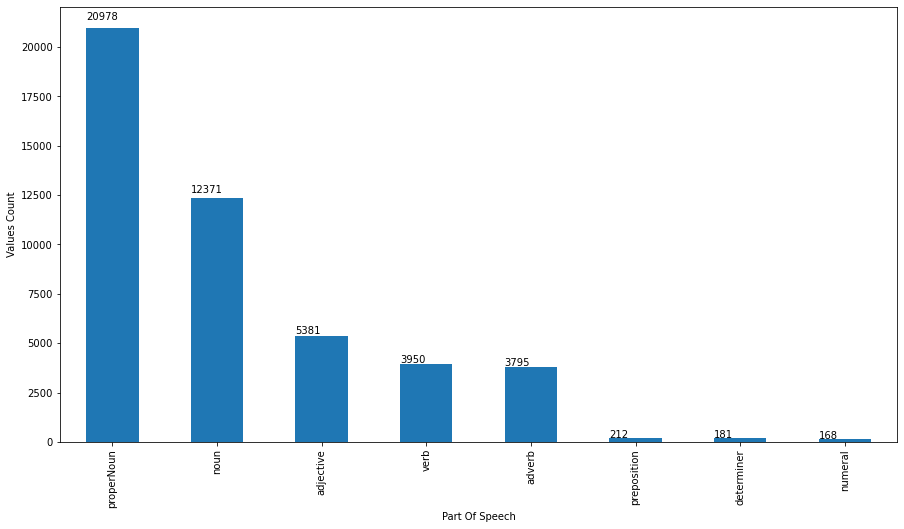

In [132]:
plt.figure();
ax = pos_counts.plot(kind="bar", figsize=(15,8), xlabel='Part Of Speech', ylabel='Values Count');
x_offset = 0
y_offset = 0
for p in ax.patches:
    b = p.get_bbox()   
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))

In [118]:
# plt.figure();
# df_check['pos_ca'].plot.bar();
# df_check.groupby('a').count()

In [ ]:
df_check.des

In [136]:
def get_accuracy(df_build, df_evaluation):
    df_all = df_build.merge(df_evaluation.drop_duplicates(),
                   how='left', indicator=True)
    a = df_all.loc[df_all['_merge']=='both']['word'].count()

    # df_all_word_pos = df_build[['word','pos']].merge(df_evaluation[['word','pos']],
                #    how='left', indicator=True)
    # b = df_all_word_pos.loc[df_all_word_pos['_merge']=='both']['word'].count()
    b = len(df_build)
    return a/b

In [137]:
print(get_accuracy(build_df_word2vec, evaluation_df))
# print(get_accuracy(build_df_glove, evaluation_df))

0.20194213904102684


In [135]:
len(build_df_word2vec)

59522